# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/chipotle.tsv).

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/chipotle.tsv', sep='\t')
data

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


### Step 3. Assign it to a variable called chipo.

In [ ]:
chipo = data

### Step 4. See the first 10 entries

In [ ]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

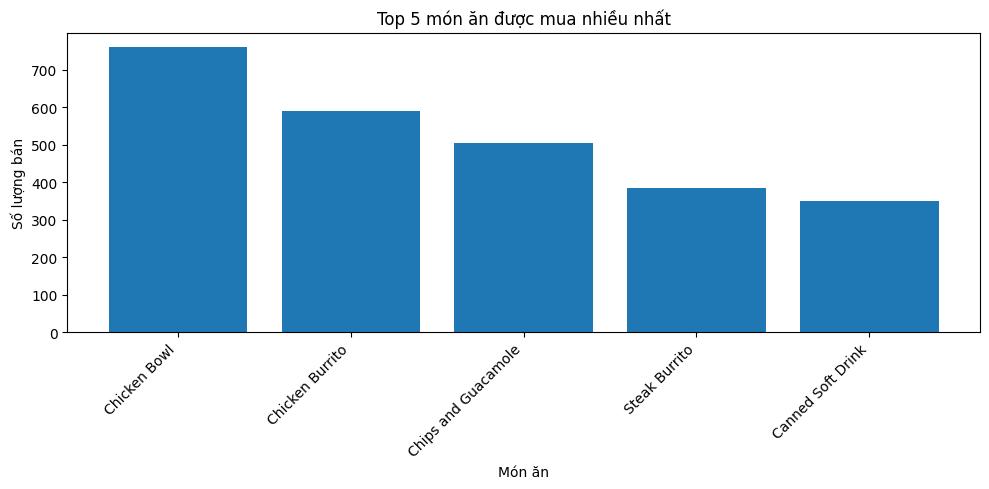

In [ ]:
item_quantities = chipo.groupby('item_name')['quantity'].sum()

top_5_items = item_quantities.sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 5))
plt.bar(top_5_items.index, top_5_items.values)
plt.xlabel('Món ăn')
plt.ylabel('Số lượng bán')
plt.title('Top 5 món ăn được mua nhiều nhất')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

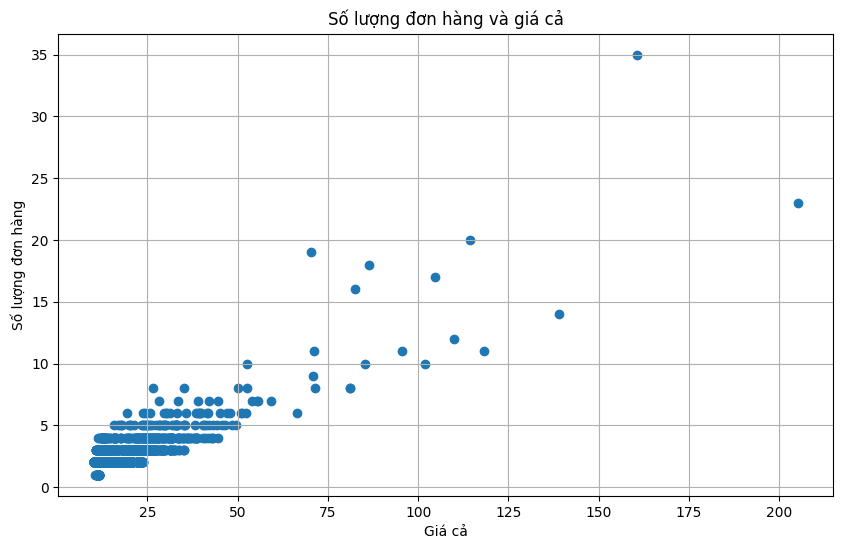

In [ ]:
orders = chipo.groupby('order_id').sum()

orders['item_price'] = orders['item_price'].str.replace('$', '').str.split().apply(lambda x: sum(float(i) for i in x))

plt.figure(figsize=(10, 6))
plt.scatter(orders['item_price'], orders['quantity'])
plt.xlabel('Giá cả')
plt.ylabel('Số lượng đơn hàng')
plt.title('Số lượng đơn hàng và giá cả')
plt.grid(True)
plt.show()

### Step 7. BONUS: Create a question and a graph to answer your own question.